In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

In [223]:
population = pd.read_csv('population.csv')

In [224]:
population = population.iloc[:, [0, 1, 5, 7, 8, 9]]

In [225]:
population.loc[population['race'] != 1, 'race'] = 2
population.loc[population['age'] < 5, 'age'] = 1
population.loc[(population['age'] >= 5) & (population['age'] <= 7), 'age'] = 2
population.loc[(population['age'] >= 8) & (population['age'] <= 10), 'age'] = 3
population.loc[(population['age'] >= 11) & (population['age'] <= 13), 'age'] = 4
population.loc[(population['age'] >= 14) & (population['age'] <= 18), 'age'] = 5

In [226]:
population.describe()

,year,race,sex,age,population
count,1.486259e+07,1.486259e+07,1.486259e+07,1.486259e+07,1.486259e+07
mean,1.994490e+03,1.601184e+00,1.501659e+00,2.907466e+00,8.860833e+02
std,1.449155e+01,4.896548e-01,4.999973e-01,1.534010e+00,4.273831e+03
min,1.969000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.982000e+03,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
50%,1.995000e+03,2.000000e+00,2.000000e+00,3.000000e+00,9.200000e+01
75%,2.007000e+03,2.000000e+00,2.000000e+00,4.000000e+00,4.720000e+02
max,2.018000e+03,2.000000e+00,2.000000e+00,5.000000e+00,3.742360e+05


In [227]:
grouped_data = population.groupby(['year', 'state', 'race', 'sex', 'age'], as_index=False).sum()
grouped_data = grouped_data[(grouped_data['year'] >= 1989) & (grouped_data['year'] <= 2009)]
grouped_data

,year,state,race,sex,age,population
20400,1989,AK,1,1,1,70499
20401,1989,AK,1,1,2,64005
20402,1989,AK,1,1,3,59043
20403,1989,AK,1,1,4,22411
20404,1989,AK,1,1,5,7597
...,...,...,...,...,...,...
41835,2009,WY,2,2,1,5263
41836,2009,WY,2,2,2,3277
41837,2009,WY,2,2,3,2572
41838,2009,WY,2,2,4,1868


In [228]:
grouped_data.to_csv('state_pop.csv', index=True)

In [230]:
grouped_state = grouped_data.pivot_table(values='population', index=['state'], columns=['year', 'race', 'sex', 'age'], aggfunc='first')
grouped_state = grouped_state.drop(['KR'])
grouped_state.fillna(0)
grouped_state

year        1989                                                         \
race           1                                                          
sex            1                                                      2   
age            1          2          3          4          5          1   
state                                                                     
AK       70499.0    64005.0    59043.0    22411.0     7597.0    64638.0   
AL      415039.0   355961.0   302390.0   212771.0   159517.0   392604.0   
AR      277207.0   216917.0   190321.0   136121.0   124319.0   261199.0   
AZ      477013.0   415207.0   316590.0   200508.0   191995.0   453280.0   
CA     3491171.0  3485400.0  2487670.0  1416725.0  1111398.0  3276232.0   
CO      455171.0   399521.0   346930.0   182498.0   127589.0   430812.0   
CT      376065.0   373109.0   310748.0   203895.0   166242.0   357444.0   
DC       15096.0    36252.0    23738.0    11278.0     9116.0    14992.0   
DE       72029.0    69802.0    53965.0    37162.0    28281.0    69202.0   
FL     1251445.0  1246370.0  1014264.0   762767.0   926690.0  1182445.0   
GA      655917.0   604056.0   503744.0   299655.0   196245.0   615900.0   
HI       37163.0    52102.0    41310.0    17695.0    12480.0    32985.0   
IA      395737.0   304613.0   256294.0   178652.0   166136.0   378166.0   
ID      167794.0   107065.0    96724.0    58181.0    51283.0   159975.0   
IL     1337760.0  1193503.0   943568.0   621467.0   498224.0  1261047.0   
IN      753486.0   608930.0   502783.0   331512.0   254536.0   716163.0   
KS      340387.0   275644.0   222124.0   145114.0   129835.0   322010.0   
KY      503949.0   407471.0   338594.0   222909.0   172510.0   476572.0   
LA      435207.0   356389.0   289350.0   190272.0   138483.0   416126.0   
MA      711017.0   736015.0   555994.0   354485.0   297998.0   681157.0   
MD      445528.0   443538.0   375704.0   234531.0   167473.0   422641.0   
ME      174579.0   142535.0   125448.0    78488.0    63990.0   165764.0   
MI     1143964.0   963084.0   796787.0   519005.0   392362.0  1088034.0   
MN      606828.0   520047.0   420781.0   254172.0   216227.0   578085.0   
MO      642382.0   531023.0   435290.0   303185.0   258547.0   610224.0   
MS      239050.0   192377.0   162139.0   116451.0    88813.0   224264.0   
MT      114834.0    80207.0    80367.0    49713.0    44248.0   108189.0   
NC      658740.0   656185.0   525745.0   349748.0   252961.0   622493.0   
ND       95061.0    76149.0    58231.0    38552.0    38071.0    89538.0   
NE      227047.0   175038.0   143692.0    95399.0    86830.0   216570.0   
NH      155629.0   141402.0   119589.0    66689.0    48834.0   149844.0   
NJ      815254.0   787580.0   664091.0   457766.0   368381.0   773096.0   
NM      213560.0   158769.0   132823.0    82518.0    64181.0   204228.0   
NV      136355.0   137287.0   114592.0    74518.0    52190.0   129213.0   
NY     1860478.0  1762083.0  1424887.0   986589.0   806409.0  1766365.0   
OH     1389525.0  1140816.0   948968.0   645413.0   502778.0  1325887.0   
OK      380833.0   306939.0   259801.0   181348.0   151682.0   360184.0   
OR      377181.0   299692.0   293403.0   167650.0   157817.0   358161.0   
PA     1414283.0  1231571.0  1037191.0   750587.0   663295.0  1346889.0   
RI      121273.0   119931.0    90461.0    60509.0    55373.0   116254.0   
SC      332076.0   312863.0   252883.0   164427.0   116676.0   313635.0   
SD       98403.0    74113.0    59532.0    41355.0    41397.0    94423.0   
TN      559111.0   485411.0   423081.0   280465.0   210662.0   527586.0   
TX     2304424.0  1902181.0  1437565.0   856988.0   613377.0  2192795.0   
UT      334481.0   197627.0   139582.0    79331.0    61303.0   321126.0   
VA      651108.0   654258.0   532750.0   315517.0   212821.0   614417.0   
VT       81510.0    68097.0    60008.0    33735.0    26125.0    77602.0   
WA      621192.0   542884.0   478057.0   269391.0   226094.0   588775.0   
WI      660047.0   553646

In [239]:
model_SC = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0)
model_SC.fit(grouped_state)
clusters_SC = pd.DataFrame(data={'state': grouped_state.index, 'label': model_SC.labels_.astype(np.int)})
clusters_SC

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,state,label
0,AK,0
1,AL,1
2,AR,0
3,AZ,3
4,CA,2
5,CO,3
6,CT,1
7,DC,0
8,DE,2
9,FL,1


In [241]:
model_KM = KMeans(n_clusters=5, random_state=0)
model_KM.fit(grouped_state)
clusters_KM = pd.DataFrame(data={'state': grouped_state.index, 'label': model_KM.labels_.astype(np.int)})
clusters_KM

,state,label
0,AK,0
1,AL,3
2,AR,0
3,AZ,3
4,CA,2
5,CO,3
6,CT,0
7,DC,0
8,DE,0
9,FL,4


In [143]:
state_pop = grouped_data.iloc[:, [0, 1, 5]].groupby(['year', 'state'], as_index=False).sum()
state_pop = state_pop.rename(columns={'year': 'year', 'state': 'state', 'population': 'total_population'})
state_pop

,year,state,total_population
0,1989,AK,547170
1,1989,AL,4030239
2,1989,AR,2346375
3,1989,AZ,3622180
4,1989,CA,29218163
...,...,...,...
1067,2009,VT,624817
1068,2009,WA,6667426
1069,2009,WI,5669264
1070,2009,WV,1847775


In [60]:
grouped_data_percent = grouped_data.copy()

In [84]:
grouped_data_percent = grouped_data_percent.merge(state_pop, on=['year', 'state'])

In [86]:
grouped_data_percent['percent_population'] = grouped_data_percent['population'] / grouped_data_percent['total_population']

In [92]:
grouped_data_percent.to_csv('state_pop2.csv', index=True)

In [94]:
grouped_data_percent.describe()

,year,race,sex,age,population,total_population,percent_population
count,290695.000000,290695.000000,290695.000000,290695.000000,2.906950e+05,2.906950e+05,2.906950e+05
mean,1993.505650,1.999966,1.500022,8.996952,4.530347e+04,5.164319e+06,8.775521e-03
std,14.431701,0.816644,0.500001,5.476212,9.699092e+04,5.791749e+06,1.167866e-02
min,1969.000000,1.000000,1.000000,0.000000,1.000000e+00,2.039370e+05,5.535716e-07
25%,1981.000000,1.000000,1.000000,4.000000,1.168000e+03,1.313688e+06,4.659114e-04
50%,1994.000000,2.000000,2.000000,9.000000,9.067000e+03,3.468957e+06,2.363196e-03
75%,2006.000000,3.000000,2.000000,14.000000,4.672000e+04,6.071745e+06,1.519210e-02
max,2018.000000,3.000000,2.000000,18.000000,1.234258e+06,3.955704e+07,6.879269e-02


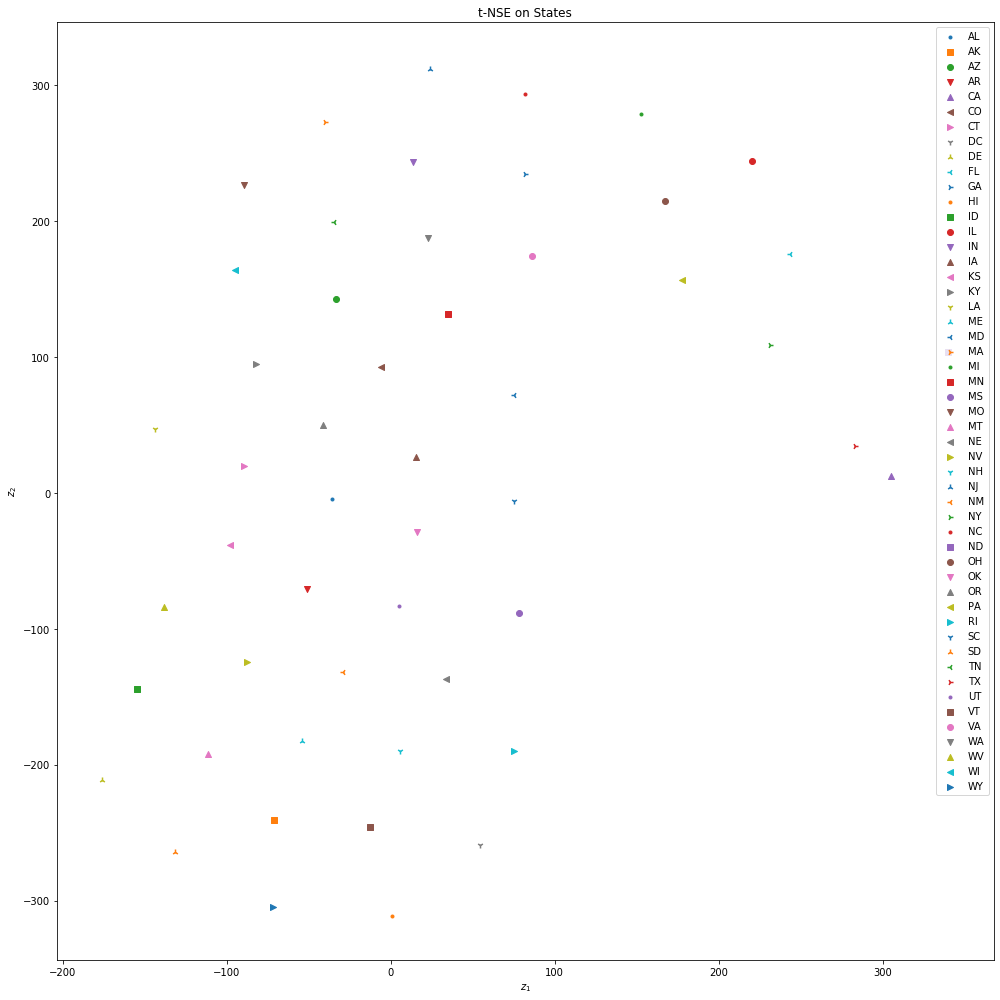

In [260]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2)
Z2 = tsne_model.fit_transform(grouped_state)

plt.figure(figsize = (14, 14))
plt.title('t-NSE on States')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
marks = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4']

for i, state in enumerate(states):
    plt.scatter(Z2[grouped_state.index == state, 0], Z2[grouped_state.index == state, 1], label=state, marker=marks[i % 11])
    
plt.legend()
plt.tight_layout()

In [248]:
Z2[grouped_state.index == 'AL']

array([[-9.587486, -8.739733]], dtype=float32)